In [3]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rc('pdf', fonttype=42)

datadir = '../../pmlb/datasets/'
frames = []
for f in glob(datadir+'/*/*.tsv.gz'):
    df = pd.read_csv(f,sep='\t') 
    group = 'feynman' if 'feynman' in f else 'strogatz' if 'strogatz' in f else 'black-box'
    frames.append(dict(
        name=f.split('/')[-1][:-7],
        nsamples = df.shape[0],
        nfeatures = df.shape[1],
        npoints = df.shape[0]*df.shape[1],
        Group=group
    ))
    
df = pd.DataFrame.from_records(frames)
df

,name,nsamples,nfeatures,npoints,Group
0,feynman_I_12_2,100000,5,500000,feynman
1,687_sleuth_ex1605,62,6,372,black-box
2,594_fri_c2_100_5,100,6,600,black-box
3,feynman_II_15_5,100000,4,400000,feynman
4,227_cpu_small,8192,13,106496,black-box
...,...,...,...,...,...
412,195_auto_price,159,16,2544,black-box
413,labor,57,17,969,black-box
414,shuttle,58000,10,580000,black-box
415,analcatdata_japansolvent,52,10,520,black-box


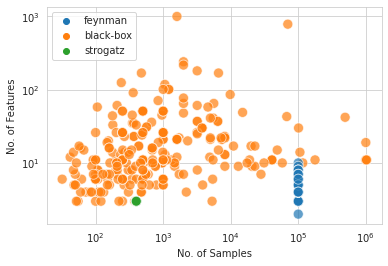

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
## PMLB dataset sizes
g = sns.scatterplot(
    data=df,
    x='nsamples',
    y='nfeatures',
    hue='Group',
    alpha=0.7,
    s=100, 
)
ax = plt.gca()
plt.legend(loc='upper left')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('No. of Samples')
plt.ylabel('No. of Features')
plt.savefig('figs/pmlb_size.png',dpi=400, bbox_inches='tight')

In [14]:
curr_df = df.copy()
curr_df = curr_df[~curr_df.Group.isin(["feynman", "strogatz"])]
print(len(curr_df)/len(df))
count_leq10 = len(curr_df[curr_df.nfeatures <= 10])
count_leq10 / len(curr_df)

417 284


0.38028169014084506